<a href="https://colab.research.google.com/github/jaesik103/paython_machin-learning/blob/main/1_KNeighborsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01-3 KNeighborsClassifier 사용
1. 기존 데이터셋 플롯
2. KNeighborsClassifier 사용
3. 최적의 n값 찾기(n값이 클수록 단순)
4. 샘플링 편향 해결(rand)

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

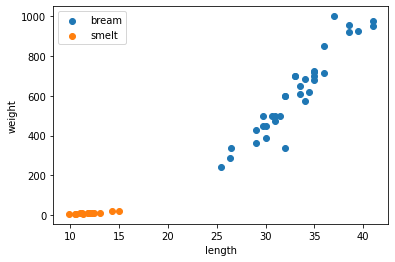

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [3]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length, weight)]
fish_data[0:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [4]:
fish_target = [1]*35 + [0]*14 # 1=bream , 0=smelt
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# KNeighborsClassifier 사용

In [5]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=17)
kn.fit(fish_data,fish_target)
kn.score(fish_data,fish_target)

1.0

# 최적 n값 찾기

In [6]:
for n in range(5, 50):
    kn.n_neighbors = n
    score = kn.score(fish_data, fish_target)
    if score<1:
        print(n,score)
        break

18 0.9795918367346939


In [7]:
kn.score(fish_data,fish_target)

0.9795918367346939

In [8]:
kn.predict([[30, 600]])

array([1])

In [9]:
print(kn._fit_X[[1, 2, 3, 4, 5]])

[[ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]]


In [10]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


# 샘플링 편향

In [11]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [12]:
import numpy as np

In [13]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


# 학습시키려면 list를 array로 꼭 변환 시켜야 함 : 

```
np.array(list)
```



In [14]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [15]:
print(input_arr[[1, 2, 3, 4, 5]])

[[ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]]


In [16]:
print(input_arr.shape)

(49, 2)


# 랜덤인덱스를 통해 샘플링 편향 해결

In [17]:
np.random.seed(43)
index = np.arange(49)
np.random.shuffle(index)

In [18]:
print(index)

[ 6 26 33 13 14 38 18 31 22  5 40 44  7 19 36  8 28 20 32  9 43 10 39 15
 24 12 41 45 29 48 46  3 42 37 34  1 25 11 35 47 23 30  2 27 17 16 21  0
  4]


In [19]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [20]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

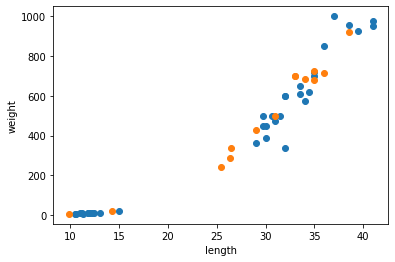

In [21]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
kn = kn.fit(train_input, train_target)

In [23]:
kn.score(test_input, test_target)

0.8571428571428571